#Predict rating by using Wish.com data
We work on Wish.com dataset to predict the rating. This data set is not clean and we'll apply data preprocessing and remove noises. We'll use LabelEncoding, drop dupicate rows and other ways to clean this data then use models like (Decision Tree, Support Vector Machine and Naive Bayes) and compare between them to detect best fit model to this problem



## Data Loading and Exploration

In [ ]:
#import pandas to help us to read csv file
import pandas as pd
#make id column the index of data
data = pd.read_csv('/train_new.csv',index_col='id')
#display data
data

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
1515,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08
940,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08
309,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08
226,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08
212,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08
163,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08


In [ ]:
#drop useless columns
data=data.drop(['currency_buyer','tags','merchant_info_subtitle',
           'urgency_text','theme','merchant_profile_picture',
           'crawl_month','merchant_id','merchant_name','shipping_option_name'],axis=1)

In [ ]:
#drop duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
#display data
data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,M,50,3,0,30,50,NaN,CN,keepahorse,66644,4.137582,1
1515,8.00,7,1000,0,4.0,843,1,1,0,0,black,L,50,3,0,37,50,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,25752,4.256873,0
940,6.00,34,100,0,4.0,10,0,0,0,0,white,L,50,2,0,41,50,NaN,CN,zhaodongmei,3897,3.928920,0
309,4.67,4,100,1,3.0,82,0,0,0,0,lakeblue,XS,5,1,0,25,50,NaN,CN,pookie0331,7497,4.079365,0
226,8.00,11,1000,0,4.0,127,0,0,0,0,apricot,S,50,3,0,15,50,1.0,CN,shitongyi12683626,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,4.00,4,10000,0,4.0,2150,0,0,0,0,red,S,50,1,0,41,50,NaN,CN,fantastic_tune,230951,4.311066,0
212,5.00,5,1000,0,5.0,377,1,0,1,0,NaN,H01,31,2,0,35,50,NaN,CN,zzbllss,2904,4.422521,0
163,9.00,48,1000,1,4.0,135,0,0,0,0,purple,M,50,3,0,25,50,NaN,CN,OIUG 56465,6632,3.748794,0


##Data Cleaning and Preprocessing
After exploring the data I found some useless columns and have no effect on rating so we'll drop them. Then I found some wrong words in size column we'll replace it with right ones. There are some nulls in data we'll fill them with suitable values.

###Replace wrong words by right ones

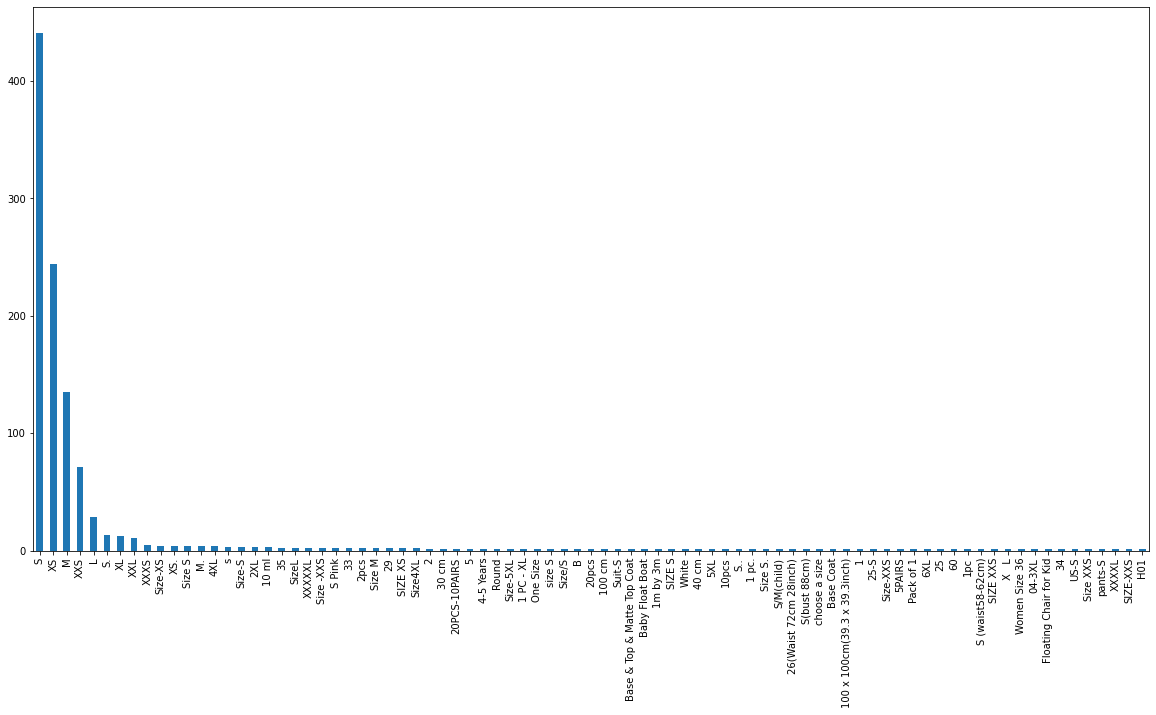

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
data["product_variation_size_id"].value_counts().plot(kind='bar')

As we saw on fig. we can replace some words with others.

In [ ]:
data['product_variation_size_id'] = data['product_variation_size_id'].replace('s', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size S.', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('size S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size/S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S Pink', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('choose a size', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S/M(child)', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S (waist58-62cm)', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S..', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('S(bust 88cm)', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('US-S', 'S')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('pants-S', 'S')

In [ ]:
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size -XXS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Suit-S', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE S', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('25-S', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XS.', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE XS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE XXS', 'XS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XXXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-XXS', 'XXS')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size XXS', 'XXS')

In [ ]:
data['product_variation_size_id'] = data['product_variation_size_id'].replace('B', 'M')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('M.', 'M')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size M', 'M')

In [ ]:
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Base Coat', 'L')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size-5XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('One Size', 'L')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('1 PC - XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('6XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('04-3XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('6XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('X   L', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('Size4XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('SizeL', 'L')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('5XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('4XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('3XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('2XL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XXL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XXXL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XXXXL', 'XL')
data['product_variation_size_id'] = data['product_variation_size_id'].replace('XXXXXL', 'XL')

In [ ]:
data['rating'] = data['rating'].replace(6, 5)
data

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,M,50,3,0,30,50,NaN,CN,keepahorse,66644,4.137582,1
1515,8.00,7,1000,0,4.0,843,1,1,0,0,black,L,50,3,0,37,50,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,25752,4.256873,0
940,6.00,34,100,0,4.0,10,0,0,0,0,white,L,50,2,0,41,50,NaN,CN,zhaodongmei,3897,3.928920,0
309,4.67,4,100,1,3.0,82,0,0,0,0,lakeblue,XS,5,1,0,25,50,NaN,CN,pookie0331,7497,4.079365,0
226,8.00,11,1000,0,4.0,127,0,0,0,0,apricot,S,50,3,0,15,50,1.0,CN,shitongyi12683626,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,4.00,4,10000,0,4.0,2150,0,0,0,0,red,S,50,1,0,41,50,NaN,CN,fantastic_tune,230951,4.311066,0
212,5.00,5,1000,0,5.0,377,1,0,1,0,NaN,H01,31,2,0,35,50,NaN,CN,zzbllss,2904,4.422521,0
163,9.00,48,1000,1,4.0,135,0,0,0,0,purple,M,50,3,0,25,50,NaN,CN,OIUG 56465,6632,3.748794,0


###Fill nulls with forward values or any value

In [ ]:
#fill nulls with forward values
data['product_color']=data['product_color'].fillna(method='ffill')
data['product_variation_size_id']=data['product_variation_size_id'].fillna(method='ffill')
data['origin_country']=data['origin_country'].fillna(method='ffill')

In [ ]:
#fill nulls with zeros because we have only one value here
data['has_urgency_banner']=data['has_urgency_banner'].fillna(0)

###Convert Strings to Integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['product_color'] = LabelEncoder().fit_transform(data['product_color'])
data['product_variation_size_id'] = LabelEncoder().fit_transform(data['product_variation_size_id'])
data['origin_country'] = LabelEncoder().fit_transform(data['origin_country'])
data['merchant_title'] = LabelEncoder().fit_transform(data['merchant_title'])

###Display our data to find if we have nulls

In [ ]:
data[data.notnull()]

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,4.0,1670,0,0,0,0,86,29,50,3,0,30,50,0.0,0,472,66644,4.137582,1
1515,8.00,7,1000,0,4.0,843,1,1,0,0,12,28,50,3,0,37,50,0.0,0,584,25752,4.256873,0
940,6.00,34,100,0,4.0,10,0,0,0,0,77,28,50,2,0,41,50,0.0,0,725,3897,3.928920,0
309,4.67,4,100,1,3.0,82,0,0,0,0,40,36,5,1,0,25,50,0.0,0,556,7497,4.079365,0
226,8.00,11,1000,0,4.0,127,0,0,0,0,8,32,50,3,0,15,50,1.0,0,597,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,4.00,4,10000,0,4.0,2150,0,0,0,0,68,32,50,1,0,41,50,0.0,0,399,230951,4.311066,0
212,5.00,5,1000,0,5.0,377,1,0,1,0,68,27,31,2,0,35,50,0.0,0,746,2904,4.422521,0
163,9.00,48,1000,1,4.0,135,0,0,0,0,66,29,50,3,0,25,50,0.0,0,187,6632,3.748794,0


##Name our label and input data

In [ ]:
y=data['rating']

In [ ]:
x=data.drop(['rating'],axis=1)

In [ ]:
x

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,1670,0,0,0,0,86,29,50,3,0,30,50,0.0,0,472,66644,4.137582,1
1515,8.00,7,1000,0,843,1,1,0,0,12,28,50,3,0,37,50,0.0,0,584,25752,4.256873,0
940,6.00,34,100,0,10,0,0,0,0,77,28,50,2,0,41,50,0.0,0,725,3897,3.928920,0
309,4.67,4,100,1,82,0,0,0,0,40,36,5,1,0,25,50,0.0,0,556,7497,4.079365,0
226,8.00,11,1000,0,127,0,0,0,0,8,32,50,3,0,15,50,1.0,0,597,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,4.00,4,10000,0,2150,0,0,0,0,68,32,50,1,0,41,50,0.0,0,399,230951,4.311066,0
212,5.00,5,1000,0,377,1,0,1,0,68,27,31,2,0,35,50,0.0,0,746,2904,4.422521,0
163,9.00,48,1000,1,135,0,0,0,0,66,29,50,3,0,25,50,0.0,0,187,6632,3.748794,0


##Now we can install test data and make same prerprocessing

In [ ]:
test_ = pd.read_csv('/test_new.csv',index_col='id')
test_

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
937,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08
270,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08
308,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08
913,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08
403,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,16.00,14,EUR,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,NaN,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08
1416,6.00,17,EUR,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,NaN,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
63,4.83,51,EUR,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08


In [ ]:
#drop useless columns
test_=test_.drop(['currency_buyer','tags','merchant_info_subtitle',
           'urgency_text','theme','merchant_profile_picture',
           'crawl_month','merchant_id','merchant_name','shipping_option_name'],axis=1)

In [ ]:
#display shapes to make sure that we have the same features in traind data and test data
test_.shape , x.shape

((479, 22), (1081, 22))

In [ ]:
test_[test_.notnull()]

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,
937,5.75,5,10,1,0,0,0,0,0,white,XS,5,2,0,139,50,NaN,CN,liyang163,3,2.333333,0
270,7.00,7,5000,0,579,0,0,0,0,black,XS,50,2,0,31,50,NaN,CN,singing the song,4213,4.058391,0
308,5.00,16,1000,1,62,0,0,0,0,blue,XS,20,2,0,41,50,NaN,CN,Surper boutique,10501,4.029235,0
913,18.00,27,5000,1,1903,0,0,0,0,blue,M,50,5,0,42,50,NaN,CN,postonny,15855,4.052917,0
403,12.00,81,20000,0,1799,0,0,0,0,white,M,50,3,0,38,50,NaN,CN,fashionforgirls,151914,4.127921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,16.00,14,100,1,27,0,0,0,0,black,M,50,4,0,35,50,NaN,VE,HERNADEZYELI,572,3.367133,0
1416,6.00,17,5000,1,817,0,0,0,0,blue,XXS,1,2,0,41,50,NaN,CN,First Crush,50864,4.079644,1
63,4.83,51,50,1,1,0,0,0,0,white,XS,3,1,0,39,50,1.0,VE,saulstore,57,3.824561,0


In [ ]:
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('s', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S.', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size-S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size S.', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('size S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size/S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S Pink', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('choose a size', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S/M(child)', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S (waist58-62cm)', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S..', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('S(bust 88cm)', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('US-S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('pants-S', 'S')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size -XXS', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Suit-S', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SIZE S', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('25-S', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XS.', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size-XS', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SIZE XS', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SIZE XXS', 'XS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size-XXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size XXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XXXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size-XXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size XXS', 'XXS')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('B', 'M')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('M.', 'M')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size M', 'M')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Base Coat', 'L')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size-5XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('One Size', 'L')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('1 PC - XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('6XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('04-3XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('6XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('X   L', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('Size4XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('SizeL', 'L')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('5XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('4XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('3XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('2XL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XXL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XXXL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XXXXL', 'XL')
test_['product_variation_size_id'] = test_['product_variation_size_id'].replace('XXXXXL', 'XL')

In [ ]:
#fill nulls with forward values
test_['product_color']=test_['product_color'].fillna(method='ffill')
test_['product_variation_size_id']=test_['product_variation_size_id'].fillna(method='ffill')
test_['origin_country']=test_['origin_country'].fillna(method='ffill')

In [ ]:
#fill nulls with zeros because we have only one value here
test_['has_urgency_banner']=test_['has_urgency_banner'].fillna(0)

In [ ]:
test_['product_color'] = LabelEncoder().fit_transform(test_['product_color'])
test_['product_variation_size_id'] = LabelEncoder().fit_transform(test_['product_variation_size_id'])
test_['origin_country'] = LabelEncoder().fit_transform(test_['origin_country'])
test_['merchant_title'] = LabelEncoder().fit_transform(test_['merchant_title'])

In [ ]:
test_

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,
937,5.75,5,10,1,0,0,0,0,0,50,28,5,2,0,139,50,0.0,1,250,3,2.333333,0
270,7.00,7,5000,0,579,0,0,0,0,5,28,50,2,0,31,50,0.0,1,321,4213,4.058391,0
308,5.00,16,1000,1,62,0,0,0,0,8,28,20,2,0,41,50,0.0,1,114,10501,4.029235,0
913,18.00,27,5000,1,1903,0,0,0,0,8,17,50,5,0,42,50,0.0,1,286,15855,4.052917,0
403,12.00,81,20000,0,1799,0,0,0,0,50,17,50,3,0,38,50,0.0,1,187,151914,4.127921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,16.00,14,100,1,27,0,0,0,0,5,17,50,4,0,35,50,0.0,3,48,572,3.367133,0
1416,6.00,17,5000,1,817,0,0,0,0,8,29,1,2,0,41,50,0.0,1,41,50864,4.079644,1
63,4.83,51,50,1,1,0,0,0,0,50,28,3,1,0,39,50,1.0,3,307,57,3.824561,0


##Now we are ready to build the first model
We'll use decision tree and try it and set hyperparameters manually and another time we'll use GridSearch to find best hyperparameters then compare train accuracy and test accuracy to find how the model is

###First trial

####Desicion Tree Model with manually hyperparameters

In [ ]:
#import model from sklearn
from sklearn import tree
from sklearn.pipeline import Pipeline

In [ ]:
#set hyperparameters manually
Model_dt1 = tree.DecisionTreeClassifier(criterion='gini',max_depth=7)
#train the model
Model_dt1 = Model_dt1.fit(x,y)

In [ ]:
#let mosel predict the output
pred_dt1 = Model_dt1.predict(test_)

In [ ]:
#display score of trained data
Model_dt1.score(x,y)

0.8399629972247918

Compared with this score and testing score on kaggle(0.80334) 

It means low bias and low variance too and that makes this model one of the best ones

#####Save output

In [ ]:
#add predicted data to test
test_['rating']=pred_dt1
#display it with ids
data_pred1=test_[['rating']]
data_pred1

,rating
id,
937,5.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,3.0
1416,4.0
63,2.0


In [ ]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
data_pred1.to_csv('/content/testrate_tree1.csv',index=True) #save the result with ids

In [ ]:
#drop rating column that we added before to use test data again in another model
test_=test_.drop(['rating'],axis=1)

###Second Trial

####Dicision Tree Model with GridSearch

We can use GridSearch to find best hyperparameters

In [ ]:
#enter hyperparameters that we could choose from
dec_tree = tree.DecisionTreeClassifier()
parameters = { 'dec_tree__criterion' :['gini', 'entropy'],
                  'dec_tree__max_depth' : [2,3,4,5,6,7,8,10,12]}
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_GS = GridSearchCV(pipe, parameters, cv = 5, verbose=True, n_jobs=-1)
clf_GS.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12]},
             verbose=True)

In [ ]:
#disply best hyperparameters to use it in our model
clf_GS.best_estimator_

Pipeline(steps=[('dec_tree', DecisionTreeClassifier(max_depth=4))])

In [ ]:
#enter the values and train the model
Model_dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
Model_dt2 = Model_dt2.fit(x, y)

In [ ]:
#predict the
pred_dt2 = Model_dt2.predict(test_)

In [ ]:
#display score
Model_dt2.score(x,y)

0.8307123034227567

Compared with this score and testing score on kaggle(0.76569) 

It means low bias and maybe low variance too

#####Save output

In [ ]:
test_['rating']=pred_dt2
data_pred2=test_[['rating']]
data_pred2

,rating
id,
937,5.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,4.0
1416,4.0
63,5.0


In [ ]:
data_pred2.to_csv('/content/testrate_tree2.csv',index=True)

In [ ]:
#drop rating column that we added before to use test data again in another model
test_=test_.drop(['rating'],axis=1)

##Now we'll see second Model
We'll use Support Vector Machine and set hyperparameters manually then in another time we'll use GridSearch to find best hyperparameters then compare train accuracy and test accuracy to find how the model is.

###Third Trial

####Support vector Machine(SVM) with GridSearch

In [ ]:
#import model from sklearn lib
from sklearn import svm
modelSVM = svm.SVC()

In [ ]:
#enter hyperparameters
param_grid = { 'C' : [0.1,1,10,100], 'gamma' : [1,0.1,0.01,0.001], 'kernel':['rbf'], 'degree': [2,3,4] }

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(modelSVM, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
clf.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=True)

In [ ]:
clf.best_estimator_

SVC(C=10, degree=2, gamma=0.1)

In [ ]:
model2=svm.SVC(C=10, degree=2, gamma=0.1)

In [ ]:
model2=model2.fit(x,y)

In [ ]:
model2.score(x,y)

0.9981498612395929

It means low bias but testing accuracy is 0.75732 and it means that we have here overfitting

In [ ]:
#predict the output of test data
pred_SVM1 = model2.predict(test_)

#####Save output

In [ ]:
test_['rating']=pred_SVM1
data_pred_SVM1=test_[['rating']]
data_pred_SVM1

,rating
id,
937,4.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,4.0
1416,4.0
63,4.0


In [ ]:
data_pred_SVM1.to_csv('/content/testrate_SVM1.csv',index=True)

In [ ]:
#drop rating column to use test data again in another model
test_=test_.drop(['rating'],axis=1)

###Fourth trial

####SVM with manually hyperparameters

In [ ]:
svc = svm.SVC(kernel ='linear', C = 1).fit(x, y)

In [ ]:
svc.score(x,y)

0.6817761332099908

This model has high variance

In [ ]:
pred_SVM2 = svc.predict(test_)

#####Save output

In [ ]:
test_['rating']=pred_SVM2
data_pred_SVM2=test_[['rating']]
data_pred_SVM2

,rating
id,
937,2.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,4.0
1416,4.0
63,3.0


In [ ]:
data_pred_SVM2.to_csv('/content/testrate_SVM2.csv',index=True)

In [ ]:
#drop rating column to use test data again in another model
test_=test_.drop(['rating'],axis=1)

##Third Model
We'll use Naive Bayes and set hyperparameters manually then compare train accuracy and test accuracy to find how the model is.

###Fifth Trial

####Naive Bayes with GridSearch

Import model and enter hyperparameters then train model

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
nb = GaussianNB()
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(estimator=nb, param_grid=params, cv=5) 
gs_nb.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
gs_nb.score(x,y)

0.7039777983348752

Test accuracy in kaggle is(0.75732).

Low variance and low bias and it maybe good model but decision tree is better than it

In [ ]:
pred_nb = gs_nb.predict(test_)

#####Save output

In [ ]:
test_['rating']=pred_nb
data_pred_nb=test_[['rating']]
data_pred_nb

,rating
id,
937,4.0
270,4.0
308,4.0
913,4.0
403,4.0
...,...
1166,4.0
1416,4.0
63,4.0


In [ ]:
data_pred_nb.to_csv('/content/testrate_NB.csv',index=True)

**After comparing all models we found that the decision tree model is the best model.**





#Questions

##1-Why Data Mining is a misnomer? What is another preferred name?

The preferred name is Knowledge discovery in database

Data mining is wrong because we need to extract knowledge from data not extract data itself.

##2-What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

The KDD process is an iterative process that consists in the selection, cleaning and transformation of data coming not only from databases but also from other heterogeneous sources, such as plain text, data warehouses, images, sound, aimed to apply to them data mining algorithms in order to discover valid, novel, potentially useful, and understandable hidden patterns.

While data engineers are focused on building and maintaining data infrastructures, data scientists tackle the data and interpret them.
Data scientists are focused on advanced mathematics and statistical analysis on that generated data.

##3-In data mining, what is the difference between prediction and categorization?

Categorization is the process of identifying the category or class label of the new observation to which it belongs. Predication is the process of identifying the missing or unavailable numerical data for a new observation.

##4-Why data science/machine learning is a bad idea in the context of information security?

Because they collect our data all the time. And if the security of system is failed the data will be available to collect and use from data scintest.

##5-What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

Confidentiality, Integerity and Availability 

Confidentiality measures are designed to prevent sensitive information from unauthorized access attempts. It is common for data to be categorized according to the amount and type of damage that could be done if it fell into the wrong hands.

Integrity involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle. Data must not be changed in transit, and steps must be taken to ensure data cannot be altered by unauthorized people.

Availability means information should be consistently and readily accessible for authorized parties. This involves properly maintaining hardware and technical infrastructure and systems that hold and display the information.

If you can protect all three, you’ve got security covered.